# Advanced Univariate Analysis

1. Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

2. Import Dataset

In [47]:
df = pd.read_csv('../data/raw/TelcoCustomerChurnPrediction.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Numerical Features Univariate Analysis

### Distribution Analysis

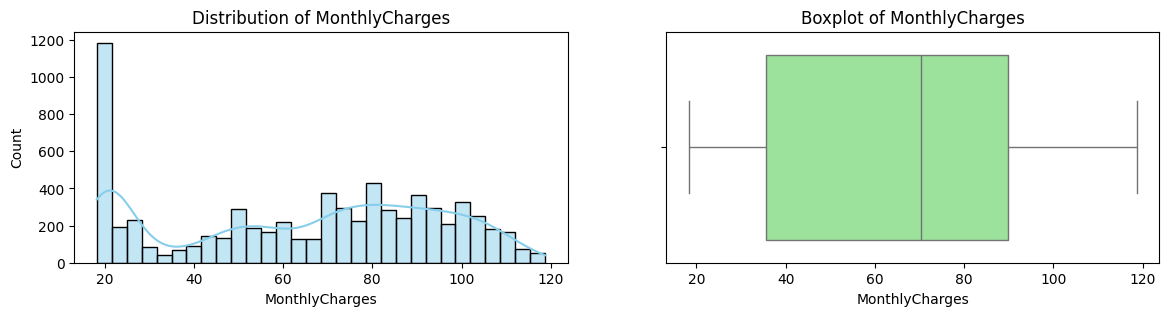

Summary of MonthlyCharges:
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64 



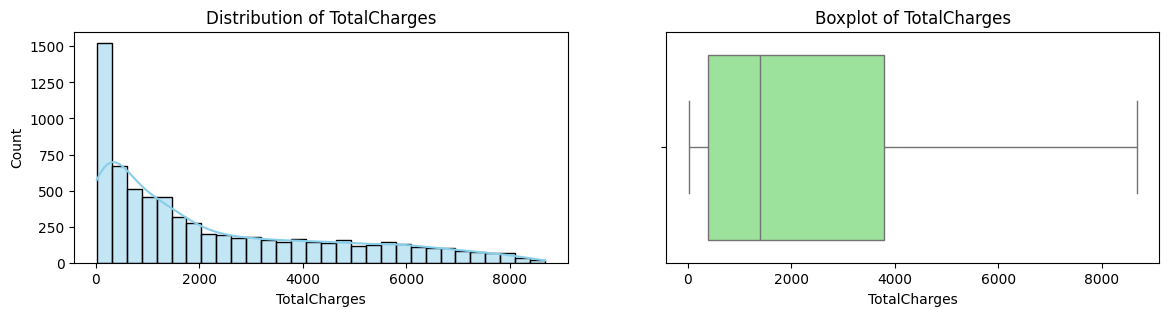

Summary of TotalCharges:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64 



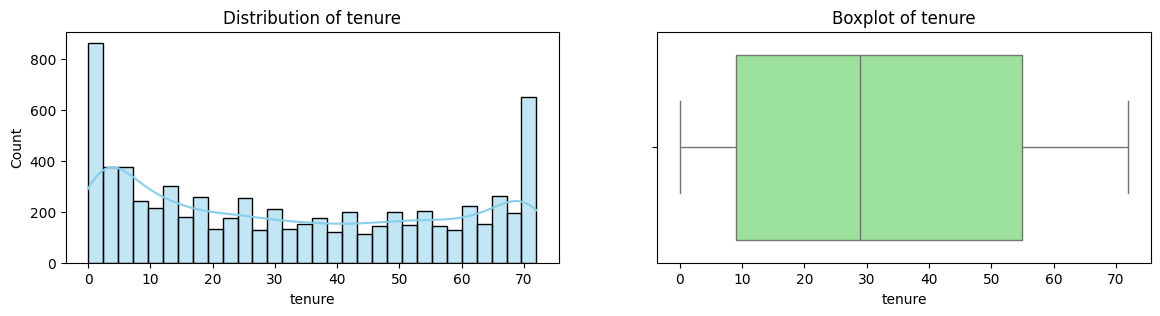

Summary of tenure:
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64 



In [48]:
numerical_features = [
                        'MonthlyCharges', 'TotalCharges', 'tenure'
                     ]
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

for feat in numerical_features:
    plt.figure(figsize=(14,3)) # Creates a new figure for plotting. wide rectangular shape for side-by-side plots.
    plt.subplot(1,2,1) 
            # Divides the figure into 1 row, 2 columns. 
            # Selects the first subplot (left side).

    # Histogram with KDE (distribution)
    sns.histplot(df[feat], kde=True, bins=30, color="skyblue")
            # sns.histplot() draws a histogram of values in the current column (col).
            # kde=True → adds a Kernel Density Estimate (smooth curve) over the histogram.
            # bins=30 → number of bins (bars) for histogram.
            # color="skyblue" → makes bars light blue.
    plt.title(f"Distribution of {feat}")
            # Sets the title of the plot dynamically.
            # f"Distribution of {col}" → inserts the column name.

    # Boxplot (outliers, spread, skewness)
    plt.subplot(1,2,2)
            # Switches to the second subplot (right side).
            # 
    sns.boxplot(x=df[feat], color="lightgreen")
            # Draws a boxplot of the column values.
            # x=df[col] → takes the feature values.
            # color="lightgreen" → sets boxplot color.
            # Boxplot shows median, quartiles, and outliers.
    plt.title(f"Boxplot of {feat}")

    plt.show()

    # Print summary statistics
    print(f"Summary of {feat}:")
    print(df[feat].describe(), "\n")

### Outlier Detection

In [49]:
# Using IQR Method
def outlier_detection_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - IQR * 1.5
    upper_bound = Q3 + IQR * 1.5

    outlier = series[(series < lower_bound) | series > upper_bound]
    return outlier

def detect_outliers_zscore(series, threshold=3):
    mean = series.mean()
    std = series.std()
    z_score = (series - mean) / std

    outliers = series[np.abs(z_score) > threshold]

    return outliers

for feat in numerical_features:
    print("\n")
    outliers_iqr = outlier_detection_iqr(df[feat])
    print(f"\nIQR Outliers in {feat}:")
    print(outliers_iqr)

    outliers_z = detect_outliers_zscore(df[feat])
    print(f"Z-score Outliers in {feat}:")
    print(outliers_z)




IQR Outliers in MonthlyCharges:
Series([], Name: MonthlyCharges, dtype: float64)
Z-score Outliers in MonthlyCharges:
Series([], Name: MonthlyCharges, dtype: float64)



IQR Outliers in TotalCharges:
Series([], Name: TotalCharges, dtype: float64)
Z-score Outliers in TotalCharges:
Series([], Name: TotalCharges, dtype: float64)



IQR Outliers in tenure:
Series([], Name: tenure, dtype: int64)
Z-score Outliers in tenure:
Series([], Name: tenure, dtype: int64)


Text(0.5, 1.0, 'Outliers in tenure (Boxplot - IQR Method)')

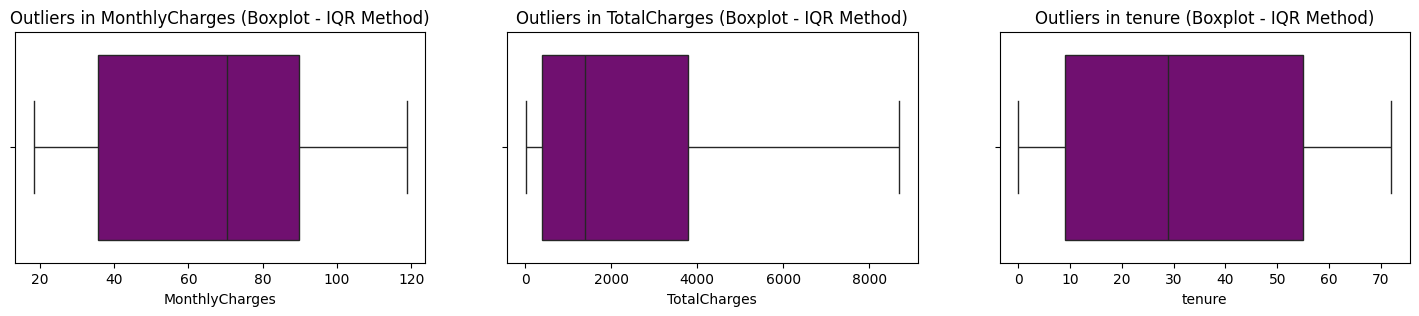

In [50]:
# Visualizing Outliers
fix, axes = plt.subplots(1,3, figsize=(18, 3)) 
sns.boxplot(x=df[numerical_features[0]], color="purple", ax=axes[0])
axes[0].set_title(f"Outliers in {numerical_features[0]} (Boxplot - IQR Method)")

sns.boxplot(x=df[numerical_features[1]], color="purple", ax=axes[1])
axes[1].set_title(f"Outliers in {numerical_features[1]} (Boxplot - IQR Method)")

sns.boxplot(x=df[numerical_features[2]], color="purple", ax=axes[2])
axes[2].set_title(f"Outliers in {numerical_features[2]} (Boxplot - IQR Method)")

## So there is no outliers in Numerical Features

## Categorical Features Univariate analysis

In [51]:
categorical_features = [
                            'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                            'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
                        ]

### Frequency Analysis

In [53]:
for feat in categorical_features:
    print(f"\n --- Frequency Analysis for {feat} ---")

    counts = df[feat].value_counts()
    print(f"Frequency counts for {feat} : {counts}")



 --- Frequency Analysis for gender ---
Frequency counts for gender : gender
Male      3555
Female    3488
Name: count, dtype: int64

 --- Frequency Analysis for SeniorCitizen ---
Frequency counts for SeniorCitizen : SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

 --- Frequency Analysis for Partner ---
Frequency counts for Partner : Partner
No     3641
Yes    3402
Name: count, dtype: int64

 --- Frequency Analysis for Dependents ---
Frequency counts for Dependents : Dependents
No     4933
Yes    2110
Name: count, dtype: int64

 --- Frequency Analysis for PhoneService ---
Frequency counts for PhoneService : PhoneService
Yes    6361
No      682
Name: count, dtype: int64

 --- Frequency Analysis for MultipleLines ---
Frequency counts for MultipleLines : MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

 --- Frequency Analysis for InternetService ---
Frequency counts for InternetService : InternetService
Fiber 

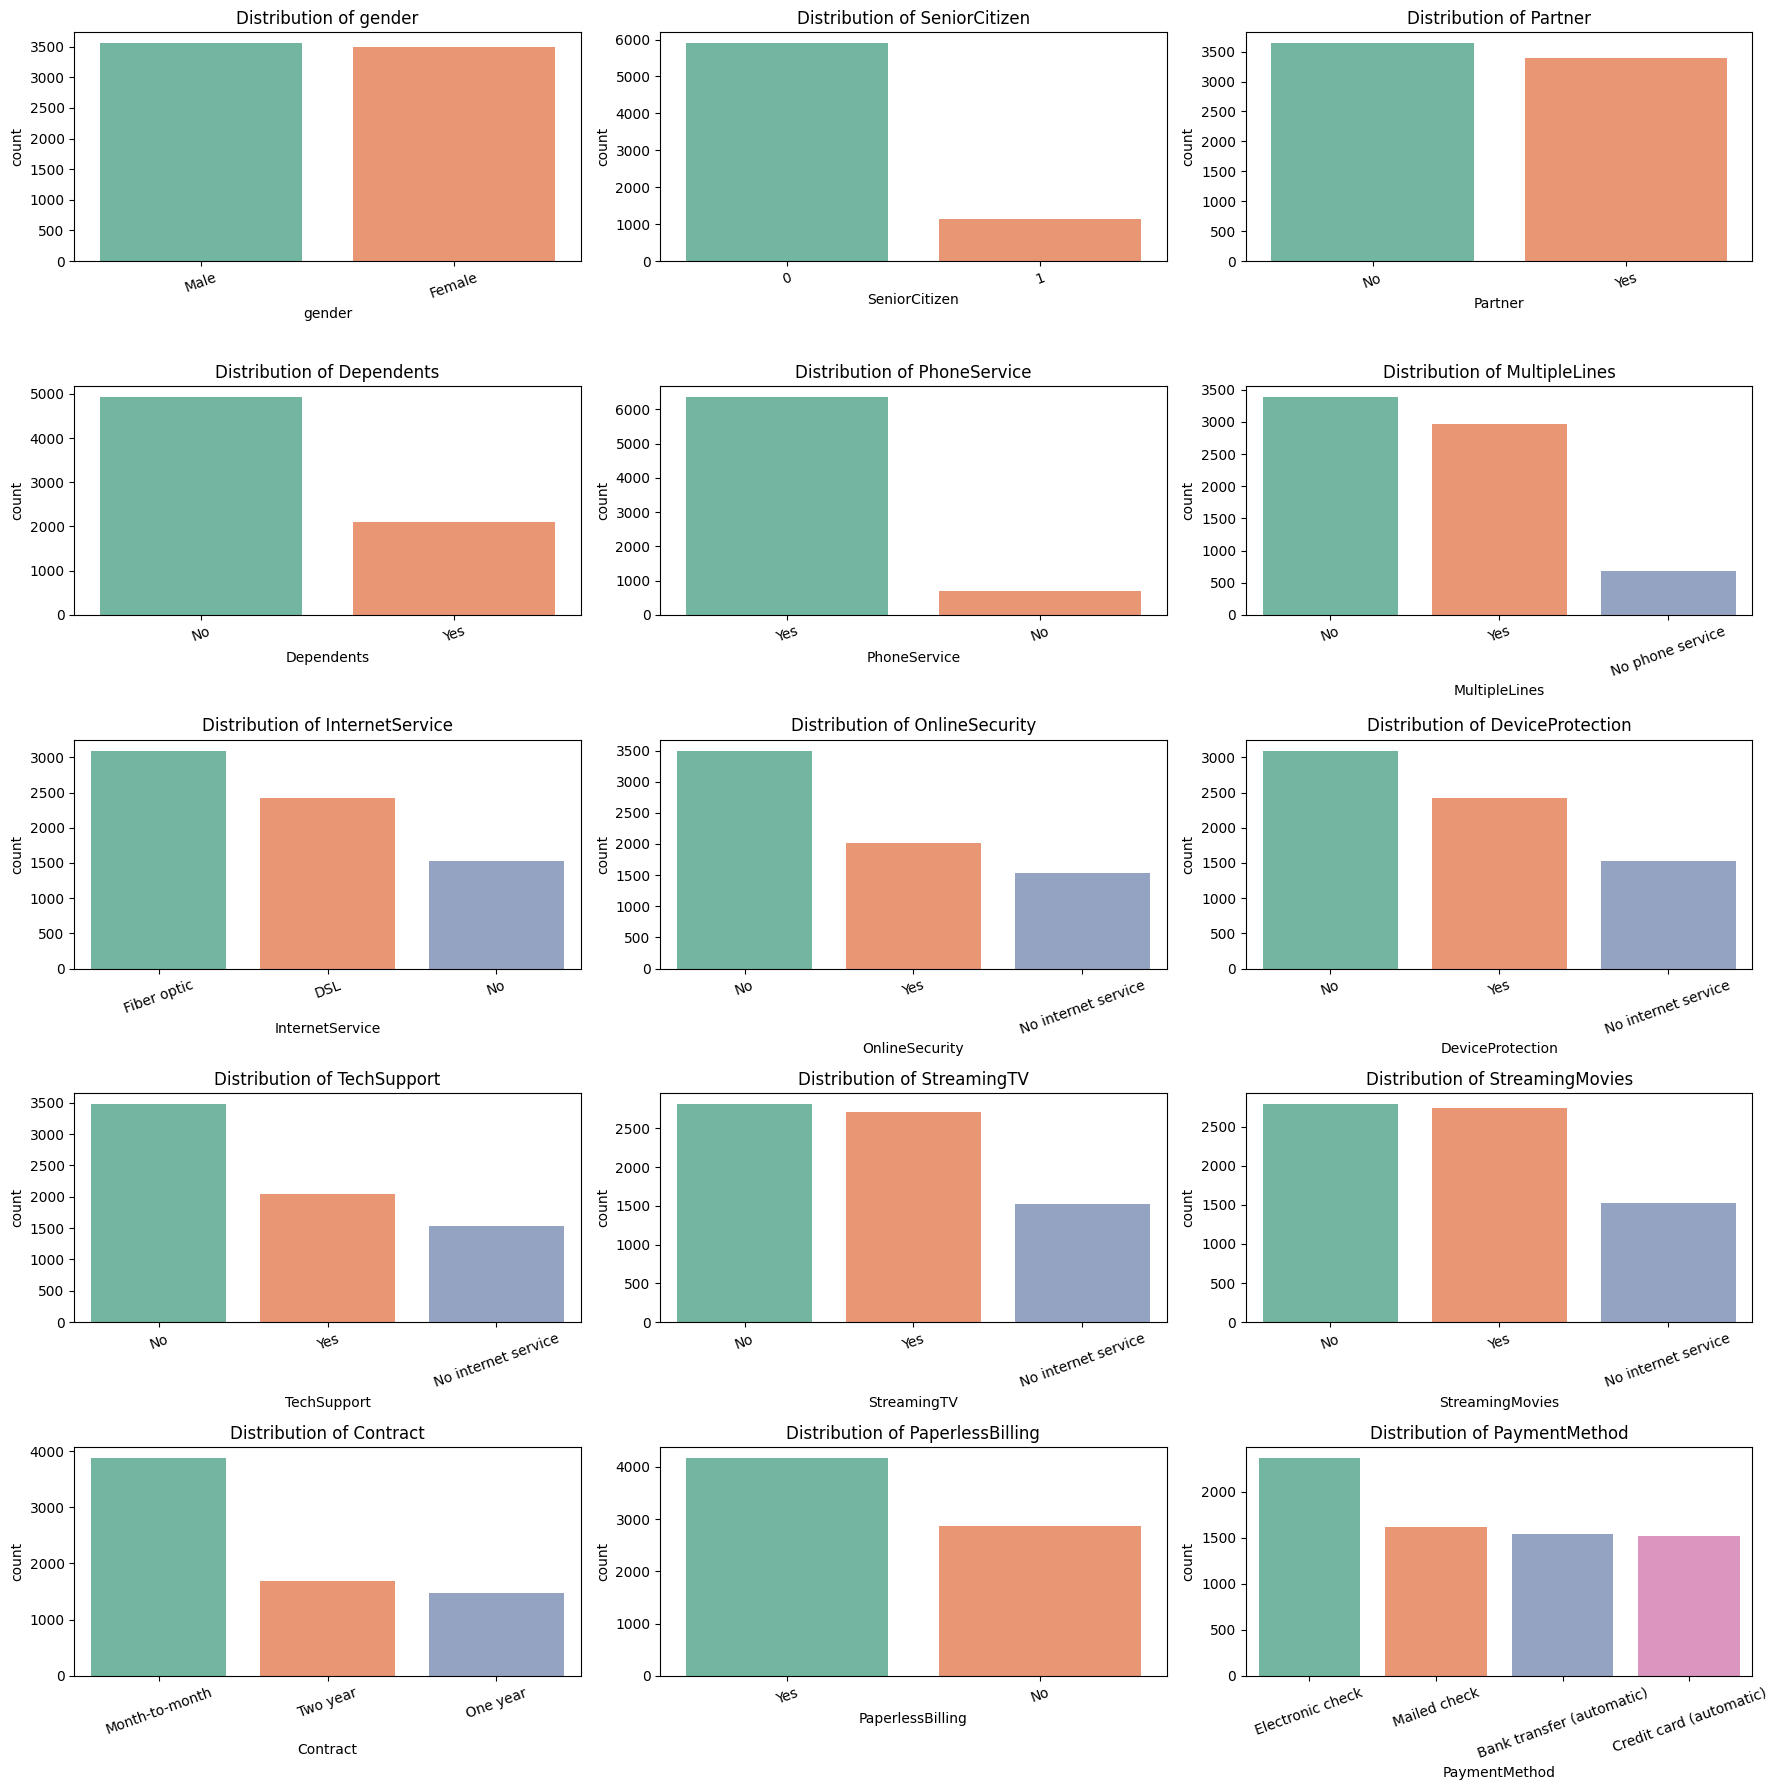

In [54]:
# Bar plot

categorical_features_2d = [
                            ['gender', 'SeniorCitizen', 'Partner'], 
                            ['Dependents', 'PhoneService', 'MultipleLines'],
                            ['InternetService', 'OnlineSecurity', 'DeviceProtection'],
                            ['TechSupport', 'StreamingTV', 'StreamingMovies'], 
                            ['Contract', 'PaperlessBilling', 'PaymentMethod']
                        ]
fig, axes = plt.subplots(5, 3, figsize=(18, 18))
for i in range(5):
    for j in range(3):
        feature = categorical_features_2d[i][j]
        counts = df[feature].value_counts()
        sns.countplot(data=df , x=feature, order=counts.index, palette='Set2', ax=axes[i, j])
        axes[i, j].set_title(f"Distribution of {feature}")
        axes[i, j].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

### Relationship with churn

In [58]:
for feat in categorical_features:
    print(f"\n ---- {feat} relationship with churn ----")
    churn_relation = pd.crosstab(df[feat], df["Churn"], normalize="index") * 100
    """ 
        - pd.crosstab(df[col], df["Churn"]): Creates a cross-tabulation (frequency table) between a 
            categorical feature (df[col])  and churn status (df["Churn"]).
        - normalize="index": Converts counts into row-wise proportions (percentages per category). 
            So instead of raw counts, each row sums to 1.
        - * 100: Converts proportions into percentages.
    """
    print(churn_relation)


 ---- gender relationship with churn ----
Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338

 ---- SeniorCitizen relationship with churn ----
Churn                 No        Yes
SeniorCitizen                      
0              76.393832  23.606168
1              58.318739  41.681261

 ---- Partner relationship with churn ----
Churn           No        Yes
Partner                      
No       67.042021  32.957979
Yes      80.335097  19.664903

 ---- Dependents relationship with churn ----
Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.549763  15.450237

 ---- PhoneService relationship with churn ----
Churn                No        Yes
PhoneService                      
No            75.073314  24.926686
Yes           73.290363  26.709637

 ---- MultipleLines relationship with churn ----
Churn                    No        Yes
MultipleLines             

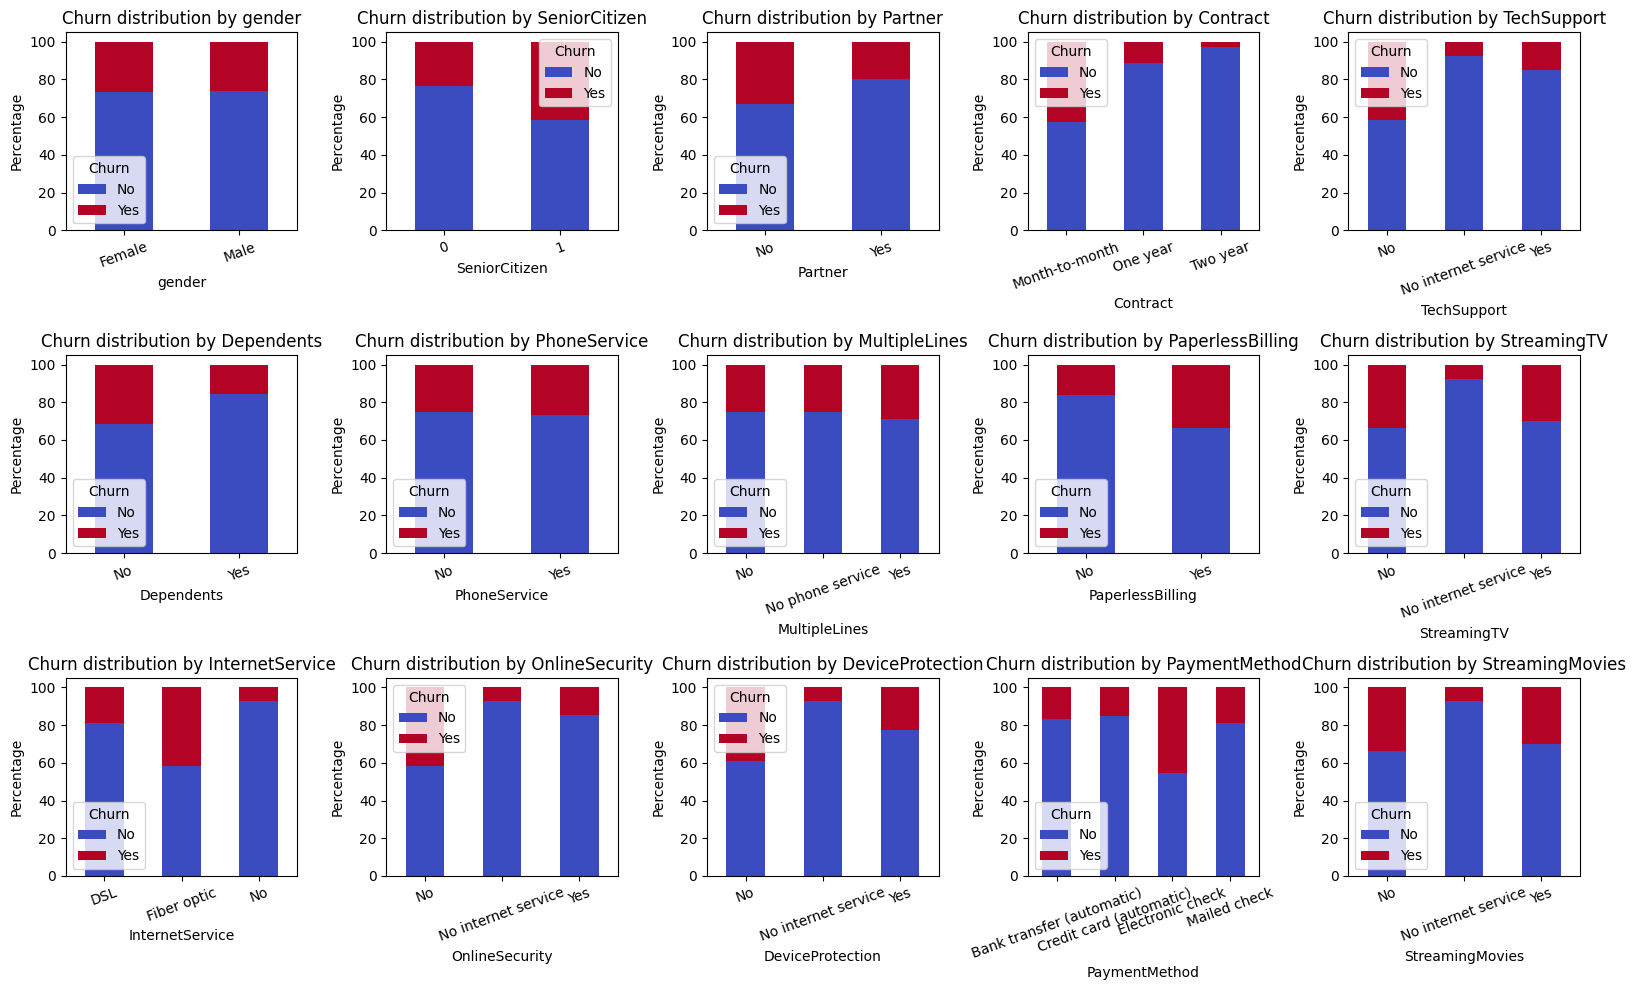

In [73]:
# Plot
categorical_features_2d = [
    ['gender', 'SeniorCitizen', 'Partner', 'Contract', 'TechSupport'], 
    ['Dependents', 'PhoneService', 'MultipleLines', 'PaperlessBilling' , 'StreamingTV'],
    ['InternetService', 'OnlineSecurity', 'DeviceProtection', 'PaymentMethod' , 'StreamingMovies'],
]

fig, axes = plt.subplots(3, 5, figsize=(16, 10))
for i in range(3):
    for j in range(5):
        feature = categorical_features_2d[i][j]
        churn_relation = pd.crosstab(df[feature], df["Churn"], normalize="index") * 100
        churn_relation.plot(kind="bar", stacked=True, colormap="coolwarm", ax=axes[i, j])
        axes[i, j].set_title(f"Churn distribution by {feature}")
        axes[i, j].set_ylabel("Percentage")
        axes[i, j].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

## Feature Engineering Opportunities